# Homework 7
Evelina Teran & Kevin Smith

In [26]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

In [27]:
# Load the image
image_path = '/Users/kevin_smith/Documents/GitHub/Applied-Machine-Learning/hw7/bird038.png'
image = Image.open(image_path)
image = image.convert('L')  # Convert to grayscale

# Normalize pixel values to [0, 1]
transform = transforms.ToTensor()
image_tensor = transform(image)

# Create a dataset of input-output pairs
def create_dataset(image_tensor):
    height, width = image_tensor.shape[1], image_tensor.shape[2]
    dataset = []
    for i in range(height):
        for j in range(width):
            input = torch.tensor([i / height, j / width], dtype=torch.float32)  # Normalize coordinates
            output = image_tensor[0, i, j]
            dataset.append((input, output))
    return dataset

dataset = create_dataset(image_tensor)

## Question 1

In [28]:
# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = NeuralNetwork()


Epoch [100/300], Loss: 0.0236
Epoch [200/300], Loss: 0.0120
Epoch [300/300], Loss: 0.0058


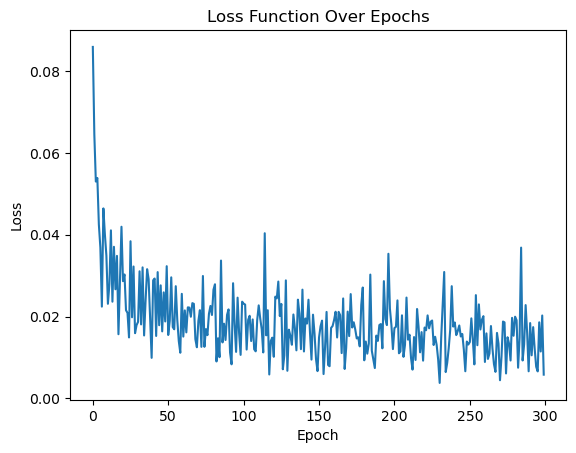

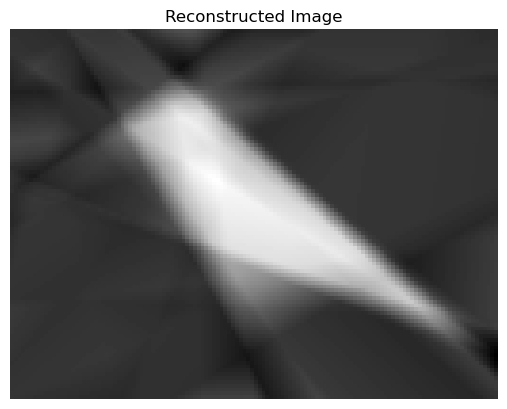

In [29]:
# Hyperparameters
learning_rate = 0.01
batch_size = 64
epochs = 300

loss_history = []

# Data loader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#  Training loop
for epoch in range(epochs):
    for inputs, targets in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Record the loss
    loss_history.append(loss.item())

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

    # Adjust the learning rate
    if (epoch + 1) % 100 == 0:
        learning_rate /= 2
        for param_group in optimizer.param_groups:
            param_group['lr'] = learning_rate

# Plot the loss function
plt.plot(range(epochs), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.show()

# Reconstruct the image
reconstructed_image = torch.zeros_like(image_tensor)
with torch.no_grad():
    for i in range(image_tensor.shape[1]):
        for j in range(image_tensor.shape[2]):
            x = i / image_tensor.shape[1]
            y = j / image_tensor.shape[2]
            reconstructed_image[0, i, j] = model(torch.tensor([x, y]))

# Display the reconstructed image in the notebook
plt.imshow(reconstructed_image[0], cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()
 


## Question 2

In [30]:
class NeuralNetworkTwoHidden(nn.Module):
    def __init__(self):
        super(NeuralNetworkTwoHidden, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNetworkTwoHidden()

Epoch [100/300], Loss: 0.0170
Epoch [200/300], Loss: 0.0012
Epoch [300/300], Loss: 0.0089


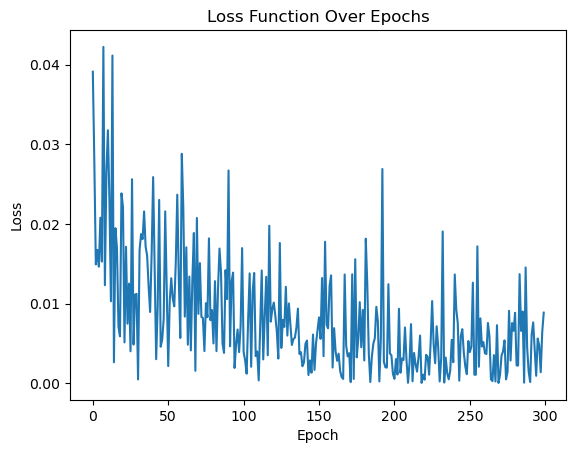

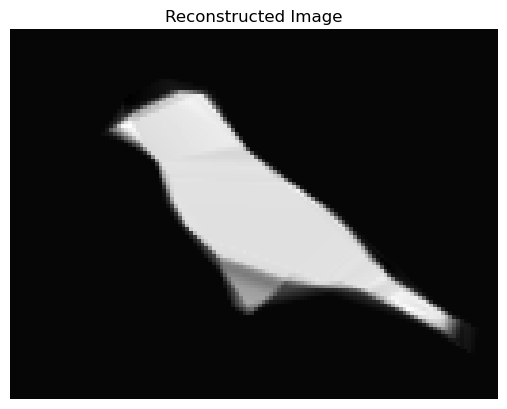

In [31]:
# Hyperparameters
learning_rate = 0.01
batch_size = 64
epochs = 300

loss_history = []

# Data loader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#  Training loop
for epoch in range(epochs):
    for inputs, targets in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Record the loss
    loss_history.append(loss.item())

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

    # Adjust the learning rate
    if (epoch + 1) % 100 == 0:
        learning_rate /= 2
        for param_group in optimizer.param_groups:
            param_group['lr'] = learning_rate

# Plot the loss function
plt.plot(range(epochs), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.show()

# Reconstruct the image
reconstructed_image = torch.zeros_like(image_tensor)
with torch.no_grad():
    for i in range(image_tensor.shape[1]):
        for j in range(image_tensor.shape[2]):
            x = i / image_tensor.shape[1]
            y = j / image_tensor.shape[2]
            reconstructed_image[0, i, j] = model(torch.tensor([x, y]))

# Display the reconstructed image in the notebook
plt.imshow(reconstructed_image[0], cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()

## Question 3

In [32]:
class NeuralNetworkThreeHidden(nn.Module):
    def __init__(self):
        super(NeuralNetworkThreeHidden, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = NeuralNetworkThreeHidden()

Epoch [100/300], Loss: 0.0009
Epoch [200/300], Loss: 0.0037
Epoch [300/300], Loss: 0.0087


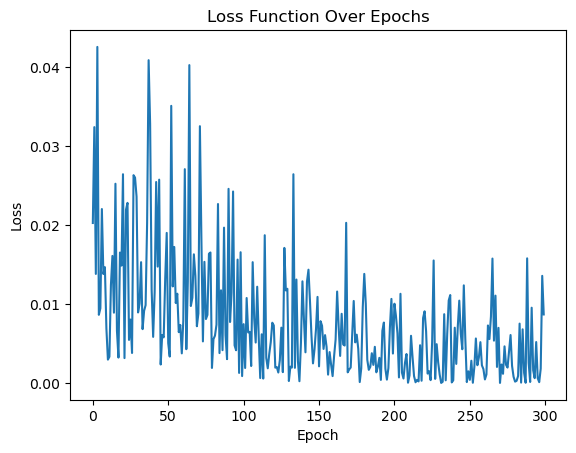

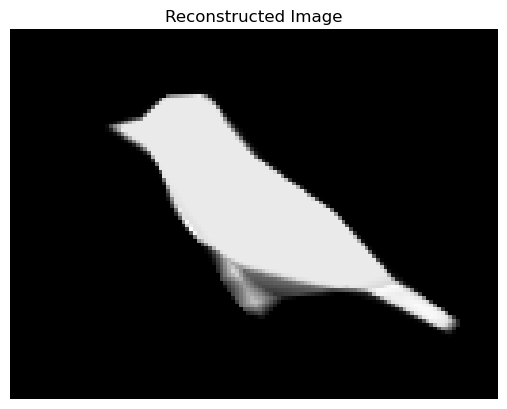

In [33]:
# Hyperparameters
learning_rate = 0.01
batch_size = 64
epochs = 300

loss_history = []

# Data loader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#  Training loop
for epoch in range(epochs):
    for inputs, targets in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Record the loss
    loss_history.append(loss.item())

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

    # Adjust the learning rate
    if (epoch + 1) % 100 == 0:
        learning_rate /= 2
        for param_group in optimizer.param_groups:
            param_group['lr'] = learning_rate

# Plot the loss function
plt.plot(range(epochs), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.show()

# Reconstruct the image
reconstructed_image = torch.zeros_like(image_tensor)
with torch.no_grad():
    for i in range(image_tensor.shape[1]):
        for j in range(image_tensor.shape[2]):
            x = i / image_tensor.shape[1]
            y = j / image_tensor.shape[2]
            reconstructed_image[0, i, j] = model(torch.tensor([x, y]))

# Display the reconstructed image in the notebook
plt.imshow(reconstructed_image[0], cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()
 


## Question 4

In [39]:
class NeuralNetworkFourHidden(nn.Module):
    def __init__(self):
        super(NeuralNetworkFourHidden, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc5 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x
       
model = NeuralNetworkFourHidden()

Epoch [100/300], Loss: 0.0109
Epoch [200/300], Loss: 0.0011
Epoch [300/300], Loss: 0.0070


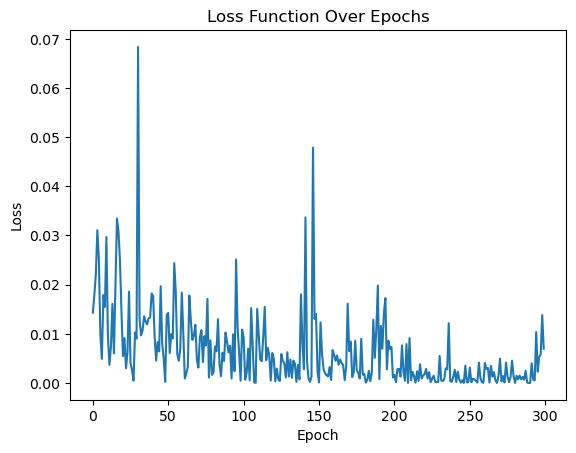

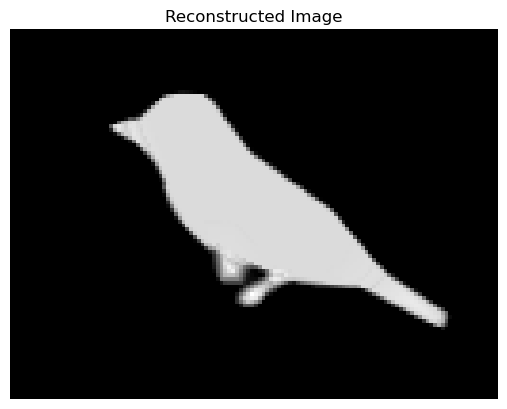

In [40]:
# Hyperparameters
learning_rate = 0.01
batch_size = 64
epochs = 300

loss_history = []

# Data loader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#  Training loop
for epoch in range(epochs):
    for inputs, targets in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Record the loss
    loss_history.append(loss.item())

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

    # Adjust the learning rate
    if (epoch + 1) % 100 == 0:
        learning_rate /= 2
        for param_group in optimizer.param_groups:
            param_group['lr'] = learning_rate

# Plot the loss function
plt.plot(range(epochs), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.show()

# Reconstruct the image
reconstructed_image = torch.zeros_like(image_tensor)
with torch.no_grad():
    for i in range(image_tensor.shape[1]):
        for j in range(image_tensor.shape[2]):
            x = i / image_tensor.shape[1]
            y = j / image_tensor.shape[2]
            reconstructed_image[0, i, j] = model(torch.tensor([x, y]))

# Display the reconstructed image in the notebook
plt.imshow(reconstructed_image[0], cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()
 
